In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB

In [3]:
df = pd.read_csv('../Data/dontpatronizeme_pcl.tsv', sep = '\t', names=['id','info','country', 'text','class'] )

In [4]:
df.head()

,id,info,country,text,class
0,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


<AxesSubplot:xlabel='class', ylabel='count'>

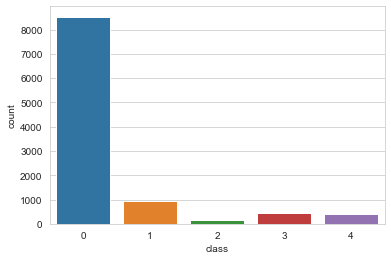

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='class',data= df)

<AxesSubplot:xlabel='info', ylabel='count'>

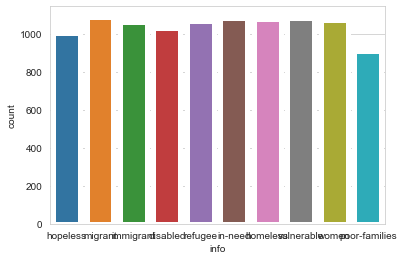

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='info',data= df, linewidth= 5)

<AxesSubplot:xlabel='class', ylabel='count'>

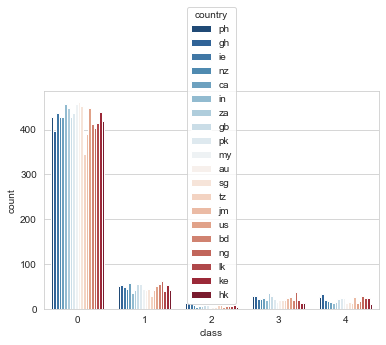

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='country',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='class', ylabel='count'>

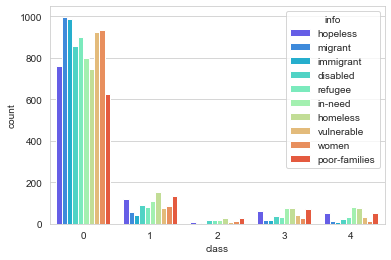

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='info',data=df,palette='rainbow')

In [9]:
df['text'].count()

10468

In [10]:
df['info']



0          hopeless
1           migrant
2         immigrant
3          disabled
4           refugee
            ...    
10464         women
10465    vulnerable
10466       in-need
10467      hopeless
10468      homeless
Name: info, Length: 10469, dtype: object

In [11]:
df = df.dropna(inplace = False)

In [12]:
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10468 non-null  object
 1   info     10468 non-null  object
 2   country  10468 non-null  object
 3   text     10468 non-null  object
 4   class    10468 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 409.0+ KB


In [13]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to C:\Users\Preetam
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
corpus =[]
from tqdm import tqdm 
for i in tqdm(range(0,10468)):
    
    review = re.sub('[^a-zA-Z]',' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set (all_stopwords)]
    review =' '.join(review)
    corpus.append(review)
    

100%|███████████████████████████████████████████████████████████████████████████| 10468/10468 [00:13<00:00, 748.07it/s]


In [15]:
corpus

['live time absolut insan pretti sure peopl awar wake everi day check news seem carri feel panic dread action hero probabl face tri decid whether cut blue green wire tick bomb except bomb instruct long ago burn fire immin catastroph seem likeliest outcom hard stay edg long though natur peopl becom inur constant chao slump malais hopeless pessim',
 'libya today countless number ghanaian nigerian immigr two countri key macroeconom challeng includ unemploy let tackl issu root not fruit thank',
 'white hous press secretari sean spicer said focu immigr action would illeg immigr also otherwis violat law',
 'council custom sign would display two space would reserv disabl person would five p space eight p one',
 'like receiv migrant flee el salvador guatemala like seen thousand econom refuge start see mexican flee violenc ju rez part mexico say shelter director ruben garcia',
 'bring high blood sugar level insulin need taken type requir insulin meal time take correct dose insulin order lower b

In [218]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer( max_features = 10)

In [219]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [220]:
cv.get_feature_names()

['disabl',
 'famili',
 'immigr',
 'need',
 'not',
 'peopl',
 'refuge',
 'said',
 'women',
 'year']

In [36]:
#X_train.inverse_transform(X_train[0])


Dividing dataset into train and test


In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)


In [43]:
#X_train.iloc[0]

In [222]:
X_train[0]

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [98]:
y_train[777]

4

In [223]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit (X_train, y_train)

GaussianNB()

In [224]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[1536   49   61   13   51]
 [ 150    9    8    4    9]
 [  31    0    1    0    1]
 [  70    5    2    1    9]
 [  66    5    7    0    6]]


In [225]:
accuracy_score(y_test, y_pred)

0.7416427889207259